In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('car_price_dataset.csv')
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [14]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

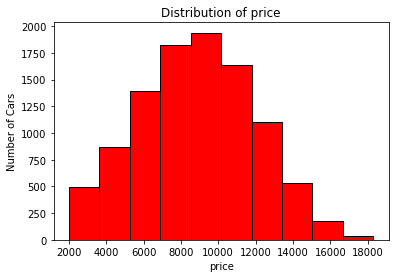

In [15]:
plt.hist(df['Price'], color='red', edgecolor='black')
plt.title("Distribution of price")
plt.xlabel("price")
plt.ylabel("Number of Cars")
plt.show()

In [ ]:
df['Price'].plot(kind='pie',subplots=True,figsize=(5,5))
plt.title("Pie Chart of Price")


In [ ]:
sns.hist(df['Price'], color='red', edgecolor='black')


In [18]:
Fuel_Type1=pd.get_dummies(df['Fuel_Type'])
print(Fuel_Type1)

      Diesel  Electric  Hybrid  Petrol
0          1         0       0       0
1          0         0       1       0
2          1         0       0       0
3          0         1       0       0
4          0         0       1       0
...      ...       ...     ...     ...
9995       1         0       0       0
9996       0         1       0       0
9997       0         0       0       1
9998       0         0       1       0
9999       1         0       0       0

[10000 rows x 4 columns]


In [19]:
Brand1=pd.get_dummies(df['Brand'])
print(Brand1)

      Audi  BMW  Chevrolet  Ford  Honda  Hyundai  Kia  Mercedes  Toyota  \
0        0    0          0     0      0        0    1         0       0   
1        0    0          1     0      0        0    0         0       0   
2        0    0          0     0      0        0    0         1       0   
3        1    0          0     0      0        0    0         0       0   
4        0    0          0     0      0        0    0         0       0   
...    ...  ...        ...   ...    ...      ...  ...       ...     ...   
9995     0    0          0     0      0        0    1         0       0   
9996     0    0          1     0      0        0    0         0       0   
9997     0    1          0     0      0        0    0         0       0   
9998     0    0          0     1      0        0    0         0       0   
9999     0    0          0     0      0        0    0         0       0   

      Volkswagen  
0              0  
1              0  
2              0  
3              0  
4   

In [20]:
Model1=pd.get_dummies(df['Model'])
print(Model1)

      3 Series  5 Series  A3  A4  Accord  C-Class  CR-V  Camry  Civic  \
0            0         0   0   0       0        0     0      0      0   
1            0         0   0   0       0        0     0      0      0   
2            0         0   0   0       0        0     0      0      0   
3            0         0   0   0       0        0     0      0      0   
4            0         0   0   0       0        0     0      0      0   
...        ...       ...  ..  ..     ...      ...   ...    ...    ...   
9995         0         0   0   0       0        0     0      0      0   
9996         0         0   0   0       0        0     0      0      0   
9997         1         0   0   0       0        0     0      0      0   
9998         0         0   0   0       0        0     0      0      0   
9999         0         0   0   0       0        0     0      0      0   

      Corolla  ...  Optima  Passat  Q5  RAV4  Rio  Sonata  Sportage  Tiguan  \
0           0  ...       0       0   0     0

In [21]:
Transmission1=pd.get_dummies(df['Transmission'])
print(Transmission1)

      Automatic  Manual  Semi-Automatic
0             0       1               0
1             1       0               0
2             1       0               0
3             0       1               0
4             0       0               1
...         ...     ...             ...
9995          0       0               1
9996          1       0               0
9997          1       0               0
9998          1       0               0
9999          0       1               0

[10000 rows x 3 columns]


In [22]:
df.drop(["Fuel_Type","Transmission","Model","Brand"],axis=1,inplace=True)
df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
0,2020,4.2,289944,3,5,8501
1,2012,2.0,5356,2,3,12092
2,2020,4.2,231440,4,2,11171
3,2023,2.0,160971,2,1,11780
4,2003,2.6,286618,3,3,2867
...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884
9996,2002,1.4,168000,2,1,6240
9997,2010,3.0,86664,5,1,9866
9998,2002,1.4,225772,4,1,4084


In [23]:
df=pd.concat([df,Fuel_Type1,Transmission1,Model1,Brand1],axis=1)
df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Diesel,Electric,Hybrid,Petrol,...,Audi,BMW,Chevrolet,Ford,Honda,Hyundai,Kia,Mercedes,Toyota,Volkswagen
0,2020,4.2,289944,3,5,8501,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2012,2.0,5356,2,3,12092,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2020,4.2,231440,4,2,11171,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2023,2.0,160971,2,1,11780,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2003,2.6,286618,3,3,2867,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9996,2002,1.4,168000,2,1,6240,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9997,2010,3.0,86664,5,1,9866,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9998,2002,1.4,225772,4,1,4084,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
reg=linear_model.LinearRegression()
reg.fit(df.drop("Price",axis="columns"),df.Price)

LinearRegression()

In [25]:
reg.coef_

array([ 2.98601356e+02,  9.92739311e+02, -1.98901643e-02, -5.50438936e-01,
        3.58754581e-02,  7.12867043e+07,  7.12886922e+07,  7.12876946e+07,
        7.12867054e+07, -1.09384329e+08, -1.09385819e+08, -1.09385821e+08,
       -2.19208582e+08, -2.19208589e+08, -1.44728113e+08, -1.44728117e+08,
       -1.54022514e+08, -1.24536238e+08, -1.54022515e+08, -4.00354968e+07,
       -1.54022507e+08, -4.00354939e+07, -1.24536241e+08, -4.67126316e+07,
       -3.67710479e+07,  1.40482601e+07,  1.40482578e+07,  1.40482610e+07,
       -1.24536232e+08,  1.61817915e+08, -3.67710430e+07, -3.67710450e+07,
       -3.06054170e+08,  1.61817916e+08, -1.44728115e+08, -4.00354859e+07,
       -3.06054170e+08, -4.67126304e+07, -3.06054170e+08,  1.61817915e+08,
       -4.67126278e+07, -2.19208576e+08, -1.34705884e+08, -6.02254138e+07,
       -2.42662952e+08, -2.93482255e+08, -1.25411477e+08, -2.32721367e+08,
        2.66201810e+07, -1.54897755e+08, -2.39398504e+08, -4.41251913e+08])

In [26]:
reg.intercept_

316940045.72211134